---

# Lecture 7. Parametric vs. Nonparametric modeling: The $k$-Nearest Neighbors Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_7/Lecture_7_1.ipynb)


What is a parameter in a machine learning model?
A **model parameter** is a configuration variable that is internal to the model and whose value can be estimated from the given data.
* They are required by the model when making predictions.
* Their values define the skill of the model on your problem.
* They are estimated or learned from historical training data.
* They are often not set manually by the practitioner.
* They are often saved as part of the learned model.

The examples of model parameters include:
* The weights in an artificial neural network.
* The coefficients in linear regression or logistic regression.

Machine learning algorithms are classified into two distinct groups: **parametric** and **nonparametric** models.

1. Parametric models deal with discrete values, and nonparametric models use continuous values.
2. Parametric models are able to infer the traditional measurements associated with normal distributions including mean, median, and mode. While some nonparametric distributions are normally oriented, often one cannot assume the data comes from a normal distribution.
3. Feature engineering is important in parametric models. Because you can poison parametric models if you feed a lot of unrelated features. Nonparametric models handle feature engineering mostly. We can feed all the data we have to those non-parametric algorithms and the algorithm can ignore unimportant features. It would not cause overfitting.
4. A parametric model can predict future values using only the parameters. While nonparametric machine learning algorithms are often slower and require large amounts of data, they are rather flexible as they minimize the assumptions they make about the data.

The single neuron model, i.e., the Perceptron, linear regression, and logistic regression, and deep neural networks, are all examples of parametric machine learning algorithms. This notebook begins are study of **nonparametric machine learning algorithms**. Some examples of popular nonparametric machine learning algorithms are:
* k-Nearest Neighbors
* Decision Trees like CART and C4.5
* Random Forests
* Support Vector Machines

This notebook implements the simpliest of these algorithms, namely, the $k$-nearest neighbors algorithm. 

## $k$-Nearest Neighbors
The $k$-nearest neighbors algorithm, or **KNN** for short, is a nonparametric algorithm that assumes that similar data exist in close proximity. In other words, similar things are near to each other. 

> "Birds of a feather flock together"

To illustrate this point, let us import the following packages, load the iris dataset, and plot the sepal length versus sepal width. 

---

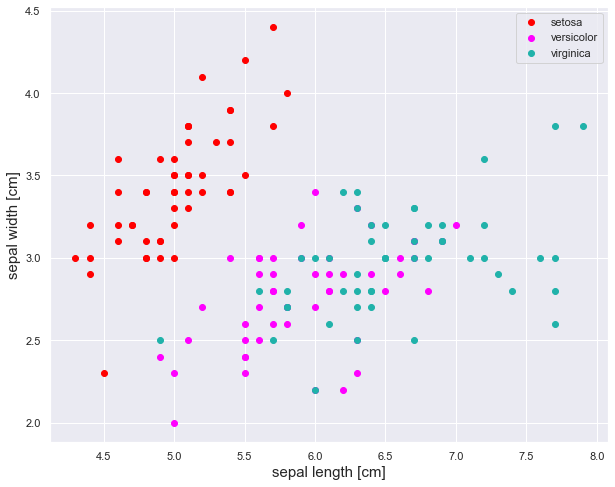

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
iris = sns.load_dataset("iris")

# Plot the data
flowers = ["setosa", "versicolor", "virginica"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.species == species]
    ax.scatter(temp_df.sepal_length,
               temp_df.sepal_width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

---

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

### The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels


Before implementing this algorithm we creat a training set and testing set by running the following code.

---

In [18]:
from sklearn.model_selection import train_test_split

X = iris[["petal_length",
          "petal_width"]].to_numpy()

y = iris["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

---

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


---

In [19]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 2.7202941017470885


---

With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below. 

---

In [20]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [21]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([4. , 1.3]), 'versicolor', 0.14142135623730948],
 [array([4. , 1.3]), 'versicolor', 0.14142135623730948],
 [array([3.9, 1.2]), 'versicolor', 0.19999999999999996],
 [array([4.1, 1.3]), 'versicolor', 0.2236067977499787],
 [array([3.6, 1.3]), 'versicolor', 0.3162277660168377]]

In [22]:
# Show the true label 
y_test[-1]

'versicolor'

---

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below. 

---

In [23]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [24]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

'versicolor'

---

Next we write a function to compute the classification error



---

In [25]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [27]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.04

## Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

### Then how to select the optimal K value?
* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 

### Advantages
* The algorithm is simple and easy to implement.
* There’s no need to build a model, tune several parameters, or make additional assumptions.
* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).


### Disadvantages
* The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

In [28]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

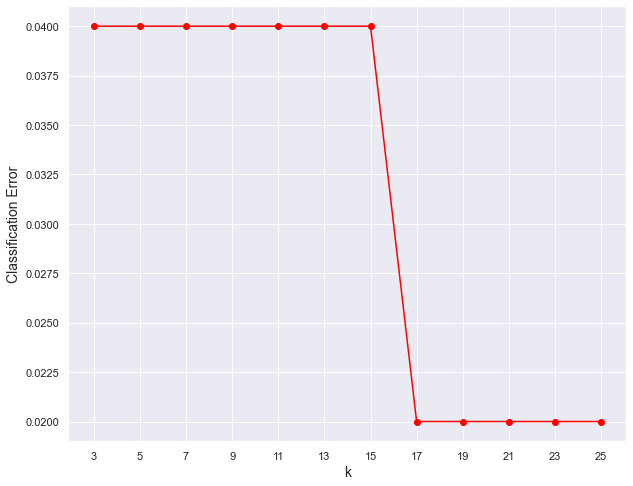

In [29]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

---

## Recommender Systems with $k$-Nearest Neighbors

Most internet products we use today are powered by recommender systems. Youtube, Netflix, Amazon, Pinterest, and long list of other internet products all rely on recommender systems to filter millions of contents and make personalized recommendations to their users. Recommender systems are well-studied and proven to provide tremendous values to internet businesses and their consumers. In fact, I was shock at the news that Netflix awarded a $1 million prize to a developer team in 2009, for an algorithm that increased the accuracy of the company’s recommendation system by 10%.

Although recommender systems are the secret source for those multi-billion businesses, prototyping a recommender system can be very low cost and doesn’t require a team of scientists. For our very simple example, we will need to load the ```movies_recommendation_data.csv``` stored in this repository. Run the following code and view the movies ```DataFrame```.


---

In [30]:
# Read the movies data from my Github repository
movies = pd.read_csv('https://raw.githubusercontent.com/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/main/Lecture_7/movies_recommendation_data.csv')
movies

,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0
5,98,21,6.8,0,1,0,0,1,0,1,0
6,31,Gifted,7.6,0,1,0,0,0,0,0,0
7,3,Travelling Salesman,5.9,0,1,0,0,0,1,0,0
8,51,Avatar,7.9,0,0,0,0,0,0,0,0
9,47,The Karate Kid,7.2,0,1,0,0,0,0,0,0


---

Lets now set the ```index``` attribute of our ```DataFrame``` to be the same as the ```MovieName``` column. This can be done by running the following code. 

---

In [31]:
# Set the index attribute for our DataFrame 
movies.set_index("MovieName", drop = False, inplace = True)
movies

,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
MovieName,,,,,,,,,,,
The Imitation Game,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
Ex Machina,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
A Beautiful Mind,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
Good Will Hunting,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
Forrest Gump,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0
21,98,21,6.8,0,1,0,0,1,0,1,0
Gifted,31,Gifted,7.6,0,1,0,0,0,0,0,0
Travelling Salesman,3,Travelling Salesman,5.9,0,1,0,0,0,1,0,0
Avatar,51,Avatar,7.9,0,0,0,0,0,0,0,0


---

We can now access the feature vectors for each movie by name! This can be done by using the ```DataFrame``` ```loc``` method as shown with the following code. Note, this returns a ```pandas.Series``` object. 

---

In [32]:
# Find the vector of data associated with "The Terminator"
movies.loc["The Terminator"]

MovieID                   14
MovieName     The Terminator
IMDBRating               8.0
Biography                  0
Drama                      0
Thriller                   0
Comedy                     0
Crime                      0
Mystery                    0
History                    0
Label                      0
Name: The Terminator, dtype: object

---

We need to know all of the column names of our ```DataFrame```. We can find these names by running the following code. 


---

In [33]:
# View the columns of our DataFrame
movies.columns

Index(['MovieID', 'MovieName', 'IMDBRating', 'Biography', 'Drama', 'Thriller',
       'Comedy', 'Crime', 'Mystery', 'History', 'Label'],
      dtype='object')

---

Next we can right a function to recommend similar movies to a given movie by simply finding the $k$-nearest neighbors to the given feature vector using the function we have already written above! 

---

In [36]:
def movie_recommendations(movie_name, df, k):
    categories = ['IMDBRating', 
                    'Biography', 
                    'Drama', 
                    'Thriller',
                    'Comedy', 
                    'Crime', 
                    'Mystery',
                    'History']

    X = df[categories].to_numpy()
    y = df["MovieName"].to_numpy()

    point = df[categories].loc[movie_name].to_numpy()
    neighbors = k_nearest_neighbors(point, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

recommendations = movie_recommendations("The Avengers", movies, 5)

print("Movie Recommendations")
for i, movie in enumerate(recommendations):
    print(f"{i+1}. {movie}")

Movie Recommendations
1. The Terminator
2. Avatar
3. Spirited Away
4. Black Panther
5. Inception


In [ ]:
movies.MovieName